<a href="https://colab.research.google.com/github/WaadAlharthi/ML_Portfolio/blob/main/NLP_Sentiment_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers.
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information.
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones.
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model***.

Classically, you can start to know the data after doing the import and load operations.
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words
- Create Word Cloud


#### 5. Sentiment Classification with Machine Learning, Deep Learning and BERT Model

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: ML algorithms(Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting), Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews.


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', None)  # Display full column width
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# filter warnings
warnings.filterwarnings('ignore')
from subprocess import check_output

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
#!pip install scikit-plot
from scikitplot.metrics import plot_roc, plot_precision_recall
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import classification_report, confusion_matrix
from scikitplot.metrics import plot_roc, plot_precision_recall , plot_precision_recall_curve
from sklearn.metrics import RocCurveDisplay, roc_auc_score, auc , roc_curve
from sklearn.metrics import recall_score

In [ ]:
#!pip install nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
#!pip install wordcloud
from wordcloud import WordCloud

In [ ]:
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download('omw-1.4')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.utils.class_weight import compute_class_weight

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
import tensorflow as tf
print(tf.__version__)
import keras
from keras.utils import to_categorical
from keras import layers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.layers import Dense, GRU, Embedding, Activation, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, Callback
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
#!pip install visualkeras
import visualkeras
from keras.utils import plot_model

2.14.0


In [ ]:
# Create dataframes
df_raw = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
df_raw.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [ ]:
df_raw.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


In [ ]:
df_raw.describe(include="O").T

,count,unique,top,freq
Title,19676,13993,Love it!,136
Review Text,22641,22634,Perfect fit and i've gotten so many compliment...,3
Division Name,23472,3,General,13850
Department Name,23472,6,Tops,10468
Class Name,23472,20,Dresses,6319


In [ ]:
df_raw['Clothing ID'].nunique()

1206

In [ ]:
df_raw['Division Name'].nunique()

3

In [ ]:
df_raw['Division Name'].unique()

array(['Initmates', 'General', 'General Petite', nan], dtype=object)

In [ ]:
df_raw['Department Name'].nunique()

6

In [ ]:
df_raw['Department Name'].unique()

array(['Intimate', 'Dresses', 'Bottoms', 'Tops', 'Jackets', 'Trend', nan],
      dtype=object)

In [ ]:
df_raw['Class Name'].nunique()

20

In [ ]:
df_raw['Class Name'].unique()

array(['Intimates', 'Dresses', 'Pants', 'Blouses', 'Knits', 'Outerwear',
       'Lounge', 'Sweaters', 'Skirts', 'Fine gauge', 'Sleep', 'Jackets',
       'Swim', 'Trend', 'Jeans', 'Legwear', 'Shorts', 'Layering',
       'Casual bottoms', nan, 'Chemises'], dtype=object)

### Data Wrangling

In [ ]:
df_raw.drop(columns = ['Unnamed: 0', 'Division Name', 'Class Name'], axis = 1, inplace = True)

In [ ]:
null_class_name_rows = df_raw[df_raw['Department Name'].isnull()]
print(len(null_class_name_rows))
null_class_name_rows

14


,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Department Name
9444,72,25,My favorite socks!!!,"I never write reviews, but these socks are so ...",5,1,0,NaN
13767,492,23,So soft!,I just love this hoodie! it is so soft and com...,5,1,1,NaN
13768,492,49,Wardrobe staple,Love this hoodie. so soft and goes with everyt...,5,1,0,NaN
13787,492,48,NaN,NaN,5,1,0,NaN
16216,152,36,Warm and cozy,"Just what i was looking for. soft, cozy and warm.",5,1,0,NaN
16221,152,37,Love!,I am loving these. they are quite long but are...,5,1,0,NaN
16223,152,39,"""long and warm""",These leg warmers are perfect for me. they are...,5,1,0,NaN
18626,184,34,Nubby footless tights,"These are amazing quality. i agree, size up to...",5,1,5,NaN
18671,184,54,New workhorse,These tights are amazing! if i care for them w...,5,1,0,NaN
20088,772,50,Comfy sweatshirt!,This sweatshirt is really nice! it's oversize...,5,1,0,NaN


The null values in this dataset are only in 14 row. I can easily replace them with the most accurate value if needed.

#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

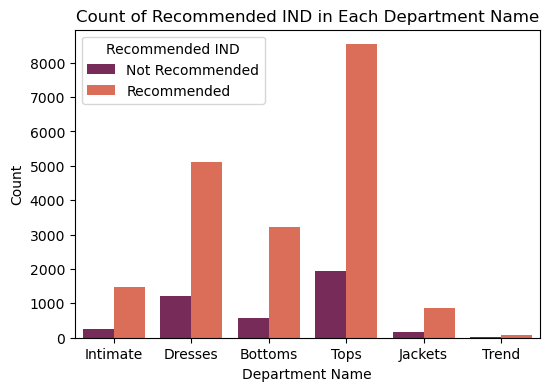

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_raw, x="Department Name", hue="Recommended IND", palette="rocket")
plt.title("Count of Recommended IND in Each Department Name")
plt.xlabel("Department Name")
plt.ylabel("Count")
plt.legend(title="Recommended IND", labels=["Not Recommended", "Recommended"])

plt.show()

In [ ]:
df_raw.columns

Index(['Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Department Name'],
      dtype='object')

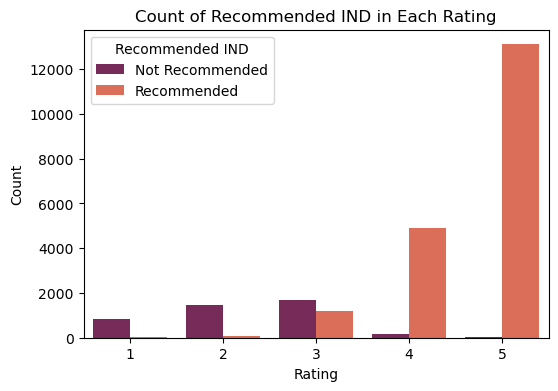

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_raw, x="Rating", hue="Recommended IND", palette="rocket")
plt.title("Count of Recommended IND in Each Rating")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.legend(title="Recommended IND", labels=["Not Recommended", "Recommended"])

plt.show()

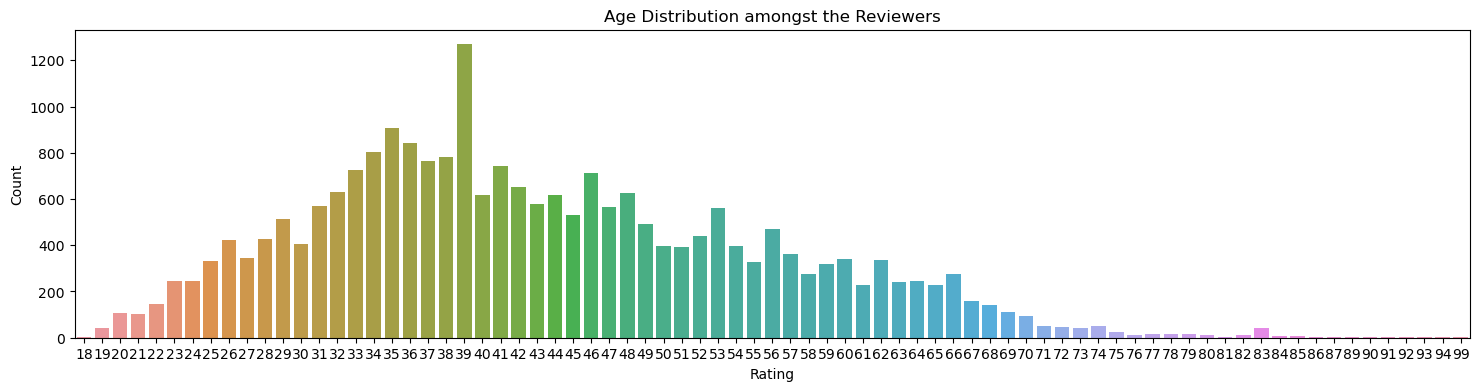

In [ ]:
plt.figure(figsize=(18, 4))
sns.countplot(data=df_raw, x="Age")
plt.title("Age Distribution amongst the Reviewers")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

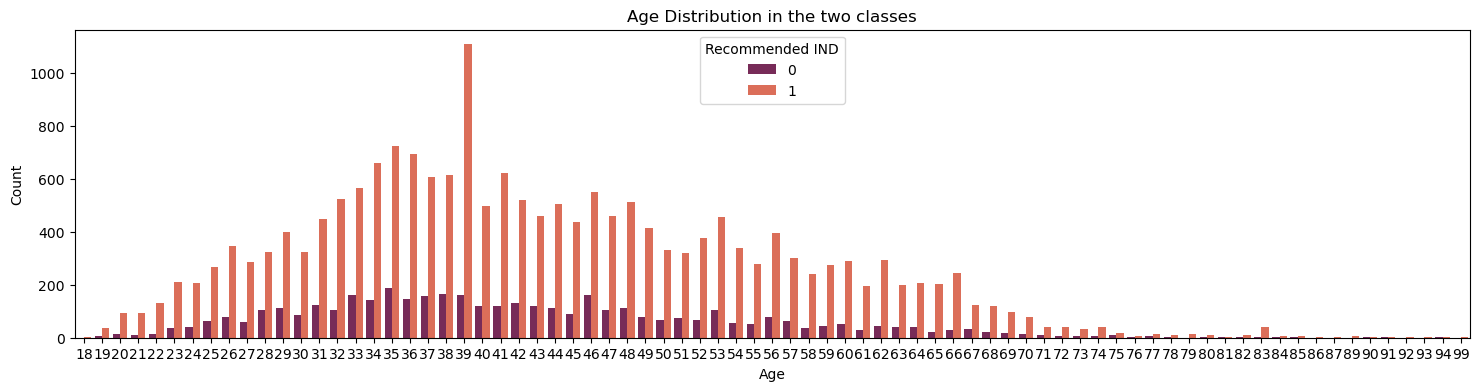

In [ ]:
plt.figure(figsize=(18, 4))
sns.countplot(x="Age", hue="Recommended IND", data=df_raw, palette="rocket")
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution in the two classes")
plt.show()

The distribution shows most reviews were posted by customers between the age of 30 to 50.

I highly doubt the ages above 80 are accurate. These users probably signed up with a fake date of birth.


## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [ ]:
df_copy = df_raw[["Review Text", "Recommended IND"]]

In [ ]:
df_copy.head()

,Review Text,Recommended IND
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


---
---


### Missing Value Detection

I'm deleting the 845 reviews that don't contain any text

In [ ]:
null_review_text_rows = df_copy[df_copy['Review Text'].isnull()]
print(len(null_review_text_rows))
null_review_text_rows

845


,Review Text,Recommended IND
92,NaN,1
93,NaN,1
98,NaN,1
135,NaN,1
142,NaN,1
...,...,...
23258,NaN,1
23301,NaN,1
23303,NaN,1
23470,NaN,1


In [ ]:
df_copy = df_copy.dropna(subset=["Review Text"])

---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma).
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method.


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [ ]:
def preprocess_text(text):
    # Tokenize the text into words
    words = word_tokenize(text)

    # Remove stopwords and punctuation
    stop_words = set(stopwords.words("english"))
    words = [word for word in words if word.lower() not in stop_words and word not in string.punctuation]

    # Normalize lexicons using WordNet lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    # Rejoin the words into a preprocessed text
    preprocessed_text = " ".join(words)

    return preprocessed_text

In [ ]:
df_copy["Processed Text"] = df_copy["Review Text"].apply(preprocess_text)

In [ ]:
pd.set_option('display.max_colwidth', None)  # Display full column width
print(df_copy["Processed Text"])

0                                                                                                                                                                                                                                                                           Absolutely wonderful silky sexy comfortable
1                                                                                                                 Love dress 's sooo pretty happened find store 'm glad bc never would ordered online bc 's petite bought petite 5 8 '' love length me- hit little knee would definitely true midi someone truly petite
2        high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium ok. overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c
3                                                               

## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words
- Create Word Cloud


### Detect Reviews (positive and negative separately)

In [ ]:
df_negative_rev, df_positive_rev = [x for _, x in df_copy.groupby(df_copy['Recommended IND'] == 1)]

In [ ]:
df_negative_rev.head(2)

,Review Text,Recommended IND,Processed Text
2,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",0,high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium ok. overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c
5,"I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i love the color and the idea of the style but it just did not work on me. i returned this dress.",0,love tracy reese dress one petite 5 foot tall usually wear 0p brand dress pretty package lot dress skirt long full overwhelmed small frame stranger alteration shortening narrowing skirt would take away embellishment garment love color idea style work returned dress


In [ ]:
df_positive_rev.head(2)

,Review Text,Recommended IND,Processed Text
0,Absolutely wonderful - silky and sexy and comfortable,1,Absolutely wonderful silky sexy comfortable
1,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",1,Love dress 's sooo pretty happened find store 'm glad bc never would ordered online bc 's petite bought petite 5 8 '' love length me- hit little knee would definitely true midi someone truly petite


### Collect Words (positive and negative separately)

In [ ]:
all_negative_words = " ".join(df_negative_rev['Processed Text'])
all_positive_words = " ".join(df_positive_rev['Processed Text'])

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

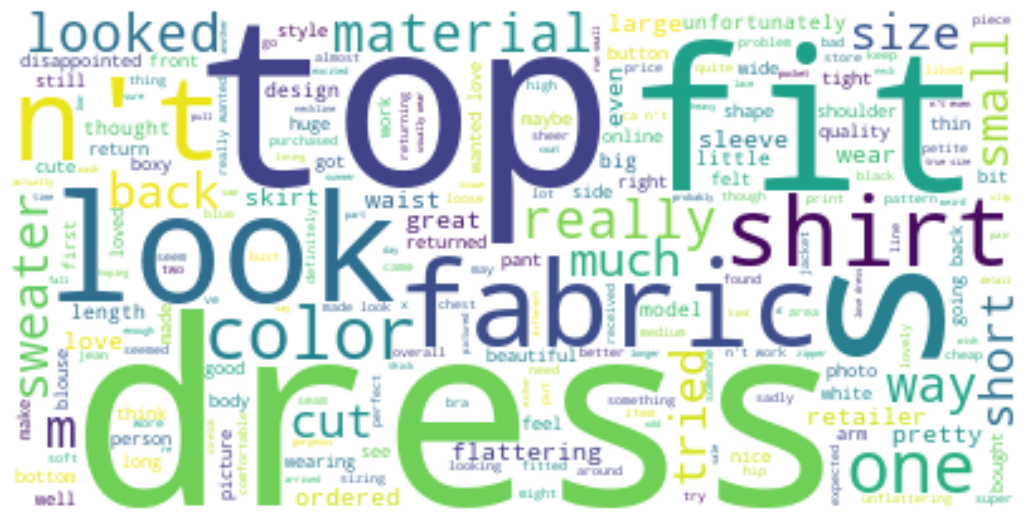

In [ ]:
worldcloud = WordCloud(background_color="white", max_words =250)
worldcloud.generate(all_negative_words)
plt.figure(figsize = (13,13))
plt.imshow(worldcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

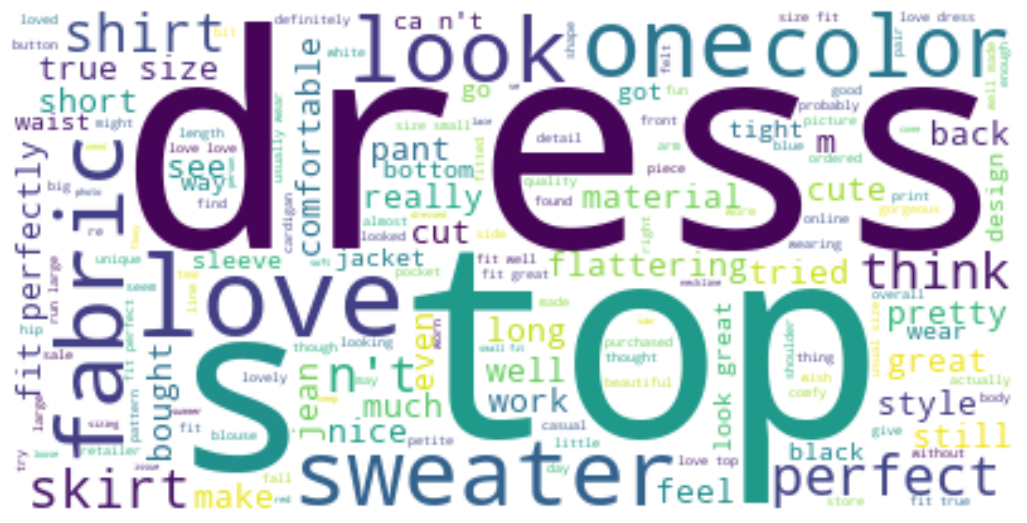

In [ ]:
worldcloud = WordCloud(background_color="white", max_words =250)
worldcloud.generate(all_positive_words)
plt.figure(figsize = (13,13))
plt.imshow(worldcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## 5. Sentiment Classification with Machine Learning, Deep Learning and BERT model

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.**

**For BERT model, use TF tensor**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model
- BERT Model

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [ ]:
X = df_copy["Review Text"]
y = df_copy["Recommended IND"]
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#Another split for the validation data
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=42)

print("Training data shape: ", X_train.shape, " , Labels : ", y_train.shape)
print("Validation data shape: ", X_val.shape, " , Labels : ", y_val.shape)
print("Test data shape: ", X_test.shape, " , Labels : ", y_test.shape)

Training data shape:  (15395,)  , Labels :  (15395,)
Validation data shape:  (2717,)  , Labels :  (2717,)
Test data shape:  (4529,)  , Labels :  (4529,)


In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [ ]:
count_vectorizer = CountVectorizer(preprocessor=preprocess_text,max_df = 0.90, max_features= 2000) # ngram_range=(1,3), max_features= 1500
X_train_count = count_vectorizer.fit_transform(X_train)
X_val_count = count_vectorizer.fit_transform(X_val)
X_test_count = count_vectorizer.transform(X_test)

In [ ]:
X_train_count.shape

(15395, 2000)

In [ ]:
X_train_count_ary = X_train_count.toarray()
X_train_count_ary

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
X_train_count_ary.shape

(15395, 2000)

In [ ]:
pd.DataFrame(X_train_count_ary, columns = count_vectorizer.get_feature_names_out())

,00,00p,0p,10,100,105,105lbs,11,110,110lbs,...,yes,yesterday,yet,yoga,yoke,young,younger,zip,zipped,zipper
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15390,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15391,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15392,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15393,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train_count_ary[0].max()

3

In [ ]:
print(*(item for item in X_train_count_ary[0] if item > 0))

1 1 3 1 1 1 1 1 2 1 1 2


### TF-IDF

In [ ]:
tf_idf_vectorizer = TfidfVectorizer(preprocessor=preprocess_text, min_df=3, max_features=2000)
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_val_tf_idf = tf_idf_vectorizer.fit_transform(X_val)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [ ]:
X_train_tfidf_ary = X_train_tf_idf.toarray()
X_train_tfidf_ary

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X_train_tfidf_ary.shape

(15395, 2000)

In [ ]:
X_train_tfidf_ary[0].max()

0.445671653190156

In [ ]:
print(*(item for item in X_train_tfidf_ary[0] if item > 0))

0.12876760427554237 0.22633384663368997 0.4178632532259768 0.18631759129245368 0.13217188614492462 0.2225353845801518 0.12308296262763638 0.1886961842049022 0.3638394506655471 0.37882083120546034 0.36140460672553276 0.445671653190156


In [ ]:
tf_idf_vectorizer.get_feature_names_out().shape

(2000,)

In [ ]:
pd.DataFrame(X_train_tfidf_ary, columns = tf_idf_vectorizer.get_feature_names_out())

,00,00p,0p,10,100,103,103lbs,105,105lbs,108,...,yesterday,yet,yoga,yoke,young,younger,youthful,zip,zipped,zipper
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15392,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15393,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Eval Function

In [ ]:
def plot_train_val_accuracy_loss(history):
    plt.figure(figsize=(6, 4))

    plt.plot(history.history['accuracy'], label='Training', color="green")
    plt.plot(history.history['val_accuracy'], label='Validation', color="red")


    plt.plot(history.history['loss'], label='Training', color="lime")
    plt.plot(history.history['val_loss'], label='Validation', color="coral")

    plt.xlim(0, len(history.epoch))
    plt.ylim([0,1])

    plt.title('Training vs Validation Accuracy and Loss ')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy and Loss')
    plt.legend()
    plt.show()

def plot_train_val_metrics(history, metric, loss):
    val_metric= "val_"+metric
    plt.figure(figsize=(6, 4))
    plt.plot(history.history[metric], label='Training', color="green")
    plt.plot(history.history[val_metric], label='Validation', color="red")

    if(loss):
        plt.plot(history.history['loss'], label='Training', color="lime")
        plt.plot(history.history['val_loss'], label='Validation', color="coral")

        plt.xlim(0, len(history.epoch))
        plt.ylim([0,1])

    plt.title('Training vs Validation')
    plt.xlabel('Epoch')
    #plt.ylabel('Accuracy and Loss')
    plt.legend()
    plt.show()


def plot_heatmap(mat):
    plt.figure(figsize=(4, 4))
    sns.heatmap(mat.T, square=True, cmap="cubehelix", annot= True, fmt='d')
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")

#Other plot functions:

#plot_precision_recall(y_val, y_val_pred)


## Logistic Regression

### CountVectorizer

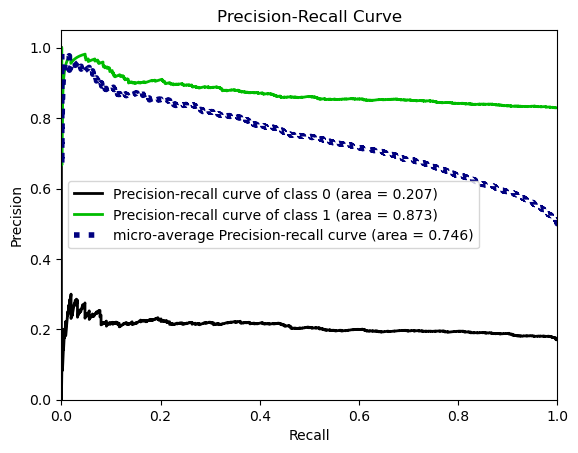

In [ ]:
model_1 = LogisticRegression(C=0.1, max_iter=400 , class_weight="balanced")

model_1.fit(X_train_count, y_train)

y_val_pred = model_1.predict_proba(X_val_count)

plot_precision_recall(y_val, y_val_pred)
plt.show();

In [ ]:
y_pred_proba[0]

array([0.14713677, 0.85286323])

              precision    recall  f1-score   support

           0       0.22      0.32      0.26       463
           1       0.84      0.76      0.80      2254

    accuracy                           0.69      2717
   macro avg       0.53      0.54      0.53      2717
weighted avg       0.74      0.69      0.71      2717



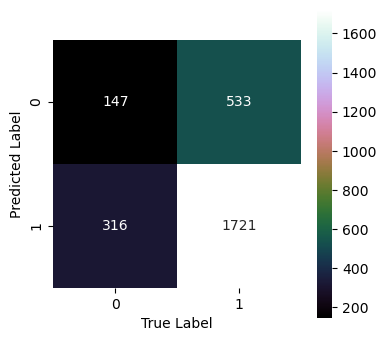

In [ ]:
y_val_pred = np.argmax(y_val_pred, axis=1)
print(classification_report(y_val, y_val_pred))
plot_heatmap(confusion_matrix(y_val, y_val_pred))

### TF-IDF

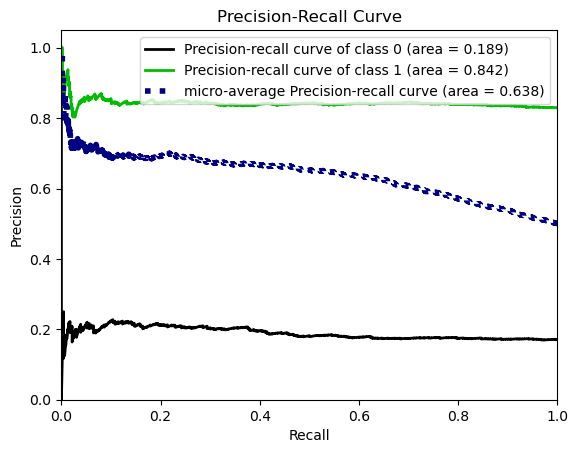

In [ ]:
model_2 = LogisticRegression(C=0.1, max_iter=400, class_weight="balanced")

model_2.fit(X_train_tf_idf, y_train)

y_val_pred = model_2.predict_proba(X_val_tf_idf)

plot_precision_recall(y_val, y_val_pred)
plt.show();

In [ ]:
y_val_pred[0]

array([0.43051816, 0.56948184])

              precision    recall  f1-score   support

           0       0.20      0.38      0.26       463
           1       0.84      0.68      0.75      2254

    accuracy                           0.63      2717
   macro avg       0.52      0.53      0.51      2717
weighted avg       0.73      0.63      0.67      2717



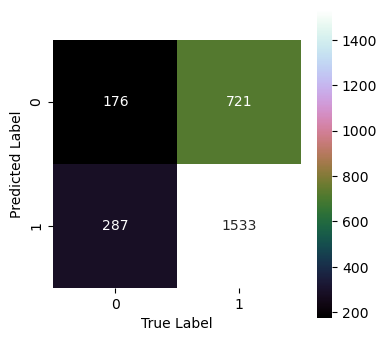

In [ ]:
y_val_pred = np.argmax(y_val_pred, axis=1)
print(classification_report(y_val, y_val_pred))
plot_heatmap(confusion_matrix(y_val, y_val_pred))

## Naive Bayes

### Countvectorizer

In [ ]:
model_3 = MultinomialNB()
model_3.fit(X_train_count,y_train)

MultinomialNB()

              precision    recall  f1-score   support

           0       0.25      0.31      0.28       463
           1       0.85      0.81      0.83      2254

    accuracy                           0.73      2717
   macro avg       0.55      0.56      0.56      2717
weighted avg       0.75      0.73      0.74      2717



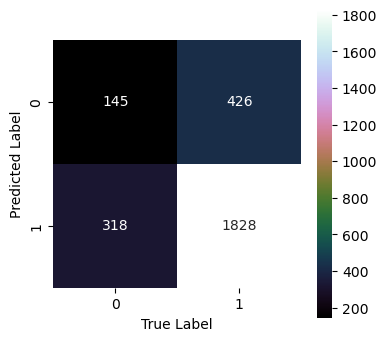

In [ ]:
y_val_pred = model_3.predict(X_val_count)

print(classification_report(y_val, y_val_pred))
plot_heatmap(confusion_matrix(y_val, y_val_pred))

In [ ]:
model_3 = MultinomialNB(alpha=2, class_prior=[1,0.9])
model_3.fit(X_train_count,y_train)

MultinomialNB(alpha=2, class_prior=[1, 0.9])

              precision    recall  f1-score   support

           0       0.21      0.65      0.32       463
           1       0.88      0.51      0.65      2254

    accuracy                           0.54      2717
   macro avg       0.54      0.58      0.48      2717
weighted avg       0.76      0.54      0.59      2717



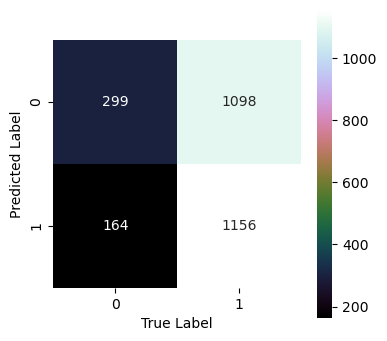

In [ ]:
y_val_pred = model_3.predict(X_val_count)

print(classification_report(y_val, y_val_pred))
plot_heatmap(confusion_matrix(y_val, y_val_pred))

### TF-IDF

In [ ]:
model_4 = MultinomialNB(alpha=2,class_prior=[1,0.9])
model_4.fit(X_train_tf_idf,y_train)

MultinomialNB(alpha=2, class_prior=[1, 0.9])

              precision    recall  f1-score   support

           0       0.17      0.92      0.29       463
           1       0.85      0.10      0.17      2254

    accuracy                           0.24      2717
   macro avg       0.51      0.51      0.23      2717
weighted avg       0.73      0.24      0.19      2717



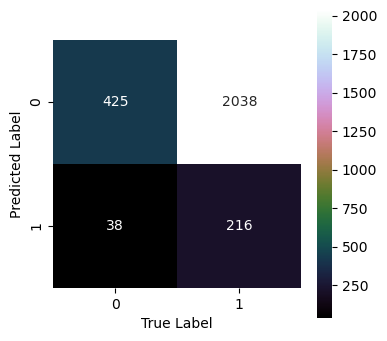

In [ ]:
y_val_pred = model_4.predict(X_val_tf_idf)
print(classification_report(y_val, y_val_pred))
plot_heatmap(confusion_matrix(y_val, y_val_pred))

## Support Vector Machine (SVM)

### Countvectorizer

In [ ]:
model_5 = LinearSVC(C=0.1, class_weight='balanced')
model_5.fit(X_train_count,y_train)

LinearSVC(C=0.1, class_weight='balanced')

              precision    recall  f1-score   support

           0       0.21      0.25      0.23       463
           1       0.84      0.81      0.83      2254

    accuracy                           0.72      2717
   macro avg       0.53      0.53      0.53      2717
weighted avg       0.73      0.72      0.72      2717



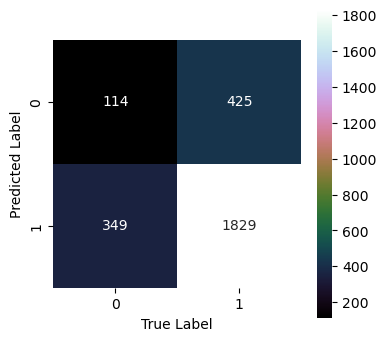

In [ ]:
y_val_pred = model_5.predict(X_val_count)
print(classification_report(y_val, y_val_pred))
plot_heatmap(confusion_matrix(y_val, y_val_pred))

### TD-IDF

In [ ]:
model_6 = LinearSVC(C=0.1, class_weight='balanced')
model_6.fit(X_train_tf_idf,y_train)

LinearSVC(C=0.1, class_weight='balanced')

              precision    recall  f1-score   support

           0       0.18      0.35      0.24       463
           1       0.84      0.68      0.75      2254

    accuracy                           0.63      2717
   macro avg       0.51      0.51      0.50      2717
weighted avg       0.72      0.63      0.66      2717



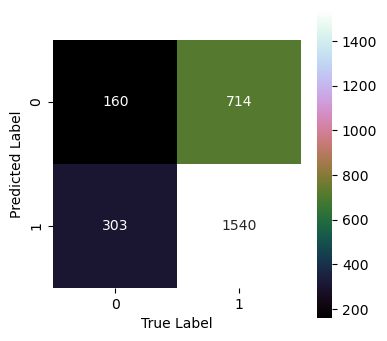

In [ ]:
y_val_pred = model_6.predict(X_val_tf_idf)
print(classification_report(y_val, y_val_pred))
plot_heatmap(confusion_matrix(y_val, y_val_pred))

## Random Forest

### Countvectorizer

In [ ]:
model_7 = RandomForestClassifier(100, max_depth = 40, random_state = 42, class_weight = "balanced")
model_7.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=40, random_state=42)

              precision    recall  f1-score   support

           0       0.19      0.48      0.27       463
           1       0.84      0.57      0.68      2254

    accuracy                           0.56      2717
   macro avg       0.52      0.53      0.48      2717
weighted avg       0.73      0.56      0.61      2717



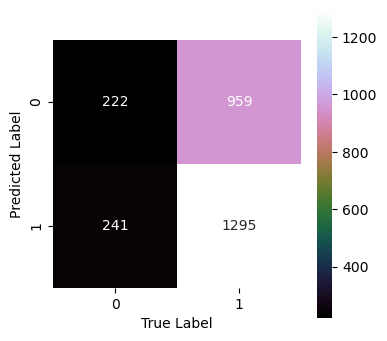

In [ ]:
y_val_pred = model_7.predict(X_val_count)
print(classification_report(y_val, y_val_pred))
plot_heatmap(confusion_matrix(y_val, y_val_pred))

### TF-IDF

In [ ]:
model_8 = RandomForestClassifier(100, max_depth = 40, random_state = 42, class_weight = "balanced")
model_8.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=40, random_state=42)

              precision    recall  f1-score   support

           0       0.20      0.44      0.28       463
           1       0.85      0.65      0.74      2254

    accuracy                           0.61      2717
   macro avg       0.53      0.54      0.51      2717
weighted avg       0.74      0.61      0.66      2717



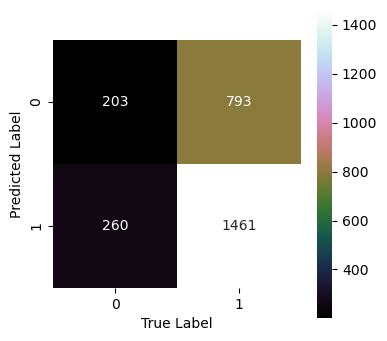

In [ ]:
y_val_pred = model_8.predict(X_val_tf_idf)
print(classification_report(y_val, y_val_pred))
plot_heatmap(confusion_matrix(y_val, y_val_pred))

## Ada Boosting

### Countvectorizer

In [ ]:
model_9 = AdaBoostClassifier(n_estimators= 100, learning_rate= 1, random_state = 42)
model_9.fit(X_train_count, y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=100, random_state=42)

              precision    recall  f1-score   support

           0       0.22      0.06      0.09       463
           1       0.83      0.96      0.89      2254

    accuracy                           0.80      2717
   macro avg       0.52      0.51      0.49      2717
weighted avg       0.73      0.80      0.75      2717



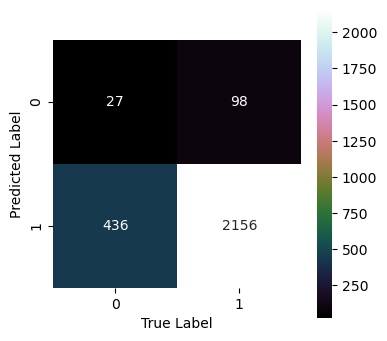

In [ ]:
y_val_pred = model_9.predict(X_val_count)

print(classification_report(y_val, y_val_pred))
plot_heatmap(confusion_matrix(y_val, y_val_pred))

### TF-IDF

In [ ]:
model_10 = AdaBoostClassifier(n_estimators= 100, learning_rate= 1,random_state = 42)
model_10.fit(X_train_count, y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=100, random_state=42)

              precision    recall  f1-score   support

           0       1.00      0.00      0.00       463
           1       0.83      1.00      0.91      2254

    accuracy                           0.83      2717
   macro avg       0.91      0.50      0.46      2717
weighted avg       0.86      0.83      0.75      2717



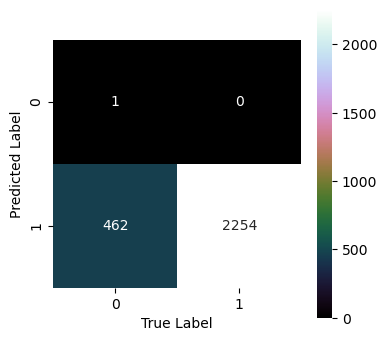

In [ ]:
y_val_pred = model_10.predict(X_val_tf_idf)

print(classification_report(y_val, y_val_pred))
plot_heatmap(confusion_matrix(y_val, y_val_pred))

## DL modeling

### Tokenization

In [ ]:
'''
These are raw data containing characters like : \r \n

X_train, y_train

X_val, y_val

X_test, y_test

'''

In [ ]:
#num_words = 10001 # we add 1.
num_words = 5000 # we add 1.

tokenizer = Tokenizer(num_words=num_words, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n\r') #filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n1234567890'
# The Tokenizer function separates all texts into word tokens.

# The num_words hyperparameter indicates that only the first 10,000 words (tokens) that occur most frequently in the corpus will be converted to their
# numeric versions during the tokenization process, while ignoring the other tokens.

# If num_words is assigned None, all words/tokens will be converted to their numeric versions. However, when num_words is set to None, it returns an error
# when providing data to the DL model. Therefore, num_words should always be assigned an integer value. We will discuss the details during the model
# building stage.

# The filters hyperparameter allows us to customize the cleaning operations. If we also want to remove numbers, we can include them in the filters
# hyperparameter.

In [ ]:
tokenizer.fit_on_texts(X_train)

### Creating word index

In [ ]:
tokenizer.word_index
# word_index sorts the tokens in the corpus according to their usage frequency.

{'the': 1,
 'i': 2,
 'and': 3,
 'a': 4,
 'it': 5,
 'is': 6,
 'this': 7,
 'to': 8,
 'in': 9,
 'but': 10,
 'on': 11,
 'for': 12,
 'of': 13,
 'with': 14,
 'was': 15,
 'so': 16,
 'my': 17,
 'dress': 18,
 'not': 19,
 'that': 20,
 'love': 21,
 'size': 22,
 'very': 23,
 'have': 24,
 'top': 25,
 'fit': 26,
 'are': 27,
 'be': 28,
 'like': 29,
 'me': 30,
 'as': 31,
 "it's": 32,
 'wear': 33,
 'great': 34,
 'too': 35,
 "i'm": 36,
 'or': 37,
 'am': 38,
 'just': 39,
 'you': 40,
 'they': 41,
 'would': 42,
 'up': 43,
 'fabric': 44,
 'small': 45,
 'at': 46,
 'color': 47,
 'look': 48,
 'if': 49,
 'more': 50,
 'really': 51,
 'ordered': 52,
 'little': 53,
 'perfect': 54,
 'these': 55,
 'will': 56,
 'flattering': 57,
 'one': 58,
 'well': 59,
 'an': 60,
 'out': 61,
 'soft': 62,
 'back': 63,
 'had': 64,
 'because': 65,
 'can': 66,
 'nice': 67,
 'cute': 68,
 'comfortable': 69,
 'than': 70,
 'bought': 71,
 'all': 72,
 'beautiful': 73,
 'large': 74,
 'shirt': 75,
 'fits': 76,
 'bit': 77,
 'when': 78,
 'looks': 

In [ ]:
len(tokenizer.word_index)

# The number of unique tokens in our corpus.

12490

### Converting tokens to numeric

In [ ]:
X_num_tokens = tokenizer.texts_to_sequences(X_train)

# The function "texts_to_sequences" converts all tokens in each document/row of our data into numbers according to their usage frequency in the
# word_index (since num_words=10001, only the first 10000 most frequently used tokens will be used).

# Example: The review "I highly advise this music, it is very beautiful." will be converted into the vector [7, 172, 7322, 19, 35, 33, 11, 712, 2776]
# where I: 7, highly: 172, advise: 7322, this: 19, music: 35, it:33, is:11, very:712,  beautiful:2776.

# Remember that these conversions are made according to the first 10,000 most frequently occurring tokens in the corpus. If the "beautiful" token was
# the 10,001st or a larger numbered token, it would be ignored during the conversion and the vector we would get would be [7, 172, 7322, 19, 35, 33, 11, 712].

In [ ]:
X_train[:2]

13983    I love this shirt and the colors it brings out. this shirt makes a great statement. it can be worn with jeans and look great or worn with slacks. i great a lot of compliments.
13568                                        Nice quality fabric and design, but found the armhole cut weirdly and fit of upper bodice strange. wanted to love it but sadly sent it back
Name: Review Text, dtype: object

In [ ]:
X_num_tokens[:2]

#We see the first two lines as numeric vectors.

[[2,
  21,
  7,
  75,
  3,
  1,
  91,
  5,
  2379,
  61,
  7,
  75,
  195,
  4,
  34,
  1146,
  5,
  66,
  28,
  180,
  14,
  93,
  3,
  48,
  34,
  37,
  180,
  14,
  1439,
  2,
  34,
  4,
  241,
  13,
  213],
 [67,
  96,
  44,
  3,
  147,
  10,
  218,
  1,
  1871,
  120,
  2629,
  3,
  26,
  13,
  670,
  753,
  831,
  188,
  8,
  21,
  5,
  10,
  481,
  989,
  5,
  63]]

### Maximum number of tokens for all documents¶

In [ ]:
len(X_num_tokens)

15395

In [ ]:
max(len(x) for x in X_num_tokens)

116

In [ ]:
from statistics import mean
mean(len(x) for x in X_num_tokens)

59.665021110750246

In [ ]:
min(len(x) for x in X_num_tokens)

2

In [ ]:
num_tokens = [len(sen_tokens) for sen_tokens in X_num_tokens]
num_tokens = np.array(num_tokens)

# Firstly, we assign the sizes of all the lines/documnets in the corpus to the variable num_tokens by putting them into a list.
# Since aggregation functions can be applied to arrays in a practical way, we convert the list to an array.

In [ ]:
num_tokens

array([35, 26, 30, ..., 15, 63, 29])

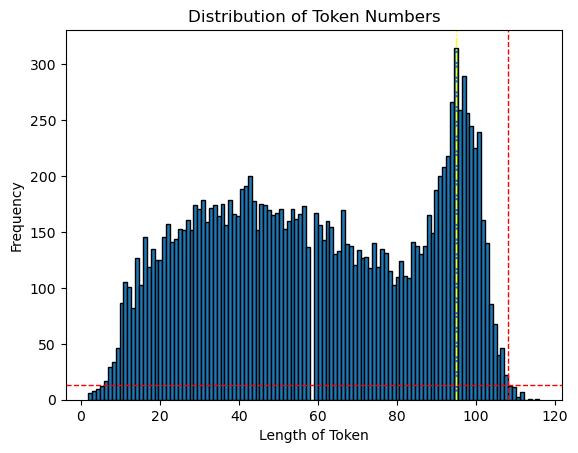

In [ ]:
# Plot a histogram to visualize the distribution
plt.hist(num_tokens, bins=116, edgecolor='black')  # Adjust the number of bins as needed
plt.title("Distribution of Token Numbers")
plt.xlabel("Length of Token")
plt.ylabel("Frequency")
plt.axvline(x=108, color='red', linestyle='--', linewidth=1)
plt.axhline(y= 13, color='red', linestyle='--', linewidth=1)
plt.axvline(x= 95, color='yellow', linestyle='-.', linewidth=1)

plt.show()

I can cut off the review tokens at 108 since longer reviews in this dataset occure at a frequency under 13.

The highest token length frequency is 95 long, which ocuured 315.

In [ ]:
max_tokens = 108

In [ ]:
hi_freq_tokens = [item for item in X_num_tokens if len(item) == 95]
len(hi_freq_tokens)

315

In [ ]:
long_tokens = [item for item in X_num_tokens if len(item) == 109]
len(long_tokens)

12

In [ ]:
long_tokens = [item for item in X_num_tokens if len(item) == 108]
len(long_tokens)

22

In [ ]:
hi_freq = np.array(hi_freq_tokens[:3])

In [ ]:
hi_freq

array([[   2,  127,  968,    4,  172,    2,  238,    4,   23,  871,  400,
          89,   14,  135, 4807, 4258,    8,    5,  980,   24,  154, 1057,
           8,   83,   12, 2384,   41,  266, 3856,    9,   46,    1,   92,
           4,   77,    7,  400,  212,  136,   20,    5,  539,    9,    4,
          23,  273,  185,    1,   96,    6,   34,   23,  179,  217,    3,
           2,   51,   21,    1,   53,  307,    3,  366,   10,    2,  125,
         209,  219,  263,  400,   36,  425, 1310,  166,    3,   90,    4,
          45,    1,   45,  603,  110,   10,    2,  100,    5,   42,   24,
          26,  300,   49,    5,   64,   50, 2632],
       [   7,   18,    6,  205,    2,  249,   21,    1,  419,    4,  953,
         108,    1,  285,  243,    1,   25,  915,   76, 2155,    1,  659,
         960,  130,  245,  110,    2,   15,  524,    8,  225,   20,    1,
         153,    2,   52,  157,  527,   16,    2,  216,  311,    1,  105,
           8,  174,    4,  164,   10,    1,  418,   15,    1,

In [ ]:
tokenizer.sequences_to_texts(hi_freq)

["i didn't receive a jacket i received a very expensive cardigan sweater with no structural qualities to it jackets have some structure to them for example they might nip in at the waist a bit this cardigan doesn't do that it hangs in a very boxy shape the quality is great very light weight and i really love the little pockets and details but i don't need want another cardigan i'm 5'5 118 lbs and got a small the small seemed big but i think it would have fit fine if it had more st",
 "this dress is gorgeous i absolutely love the embroidery a note about the sizing while the top portion fits snugly the hip section runs slightly big i was surprised to find that the 4 i ordered looked baggy so i went into the store to try a 2 but the 0 was the best fit however i'm small chested and 5'6 so i was able to go with the 0 as it fit the hips much better if you're a bustier type though the top may be tight other than the tricky sizing it's perfect",
 "i ordered this in size xl the fit is true to s

### Fixing token counts of all documents (pad_sequences)

In [ ]:
X_train_pad = pad_sequences(X_num_tokens, maxlen=max_tokens, padding="pre")

# padding="pre", paddings and truncating are performed from the beginning.

# This process is called padding. However, don't let the name mislead you; not only the filling process is performed in this operation, but also the truncating
# process.

In [ ]:
X_train_pad.shape

# We see that all comments are fixed to 108 tokens.
#We named it X_pad to indicate that it is data subjected to padding process.

(15395, 108)

### Train Set Split

I will perform the same process I did on validation and test data:

In [ ]:
'''

These are raw data containing characters like : \r \n

X_train, y_train

X_val, y_val

X_test, y_test

'''

In [ ]:
X_val_pad = tokenizer.texts_to_sequences(X_val)
X_val_pad = pad_sequences(X_val_pad, maxlen=max_tokens, padding="pre")
X_val_pad.shape

(2717, 108)

In [ ]:
X_test_pad = tokenizer.texts_to_sequences(X_test)
X_test_pad = pad_sequences(X_test_pad, maxlen=max_tokens, padding="pre")
X_test_pad.shape

(4529, 108)

### Modelling

In [ ]:
model_11 = Sequential()
embedding_size = 50
model_11.add(Embedding(input_dim=num_words, output_dim=embedding_size, input_length=max_tokens))

model_11.add(Dropout(0.2))

model_11.add(GRU(units=50, return_sequences=True))
model_11.add(GRU(units=25, return_sequences=True))
model_11.add(Dropout(0.2))

model_11.add(GRU(units=12, return_sequences=True))
model_11.add(GRU(units=4, return_sequences=False))
model_11.add(Dense(1, activation='sigmoid'))


optimizer = Adam(learning_rate=0.008)


model_11.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['Recall'])


model_11.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 108, 50)           250000    
                                                                 
 dropout_4 (Dropout)         (None, 108, 50)           0         
                                                                 
 gru_8 (GRU)                 (None, 108, 50)           15300     
                                                                 
 gru_9 (GRU)                 (None, 108, 25)           5775      
                                                                 
 dropout_5 (Dropout)         (None, 108, 25)           0         
                                                                 
 gru_10 (GRU)                (None, 108, 12)           1404      
                                                                 
 gru_11 (GRU)                (None, 4)                

In [ ]:
early_stop = EarlyStopping(monitor="val_recall", mode="max", verbose=1,
                           patience = 10, restore_best_weights=True)
history_11= model_11.fit(X_train_pad, y_train, epochs=2, batch_size=32, validation_data=(X_val_pad, y_val), verbose=0, callbacks=[early_stop])

In [ ]:
visualkeras.layered_view(model_11)

TypeError: 'int' object is not iterable

In [ ]:
plot_model(model_11, to_file='model_11.png')

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


### Model Evaluation

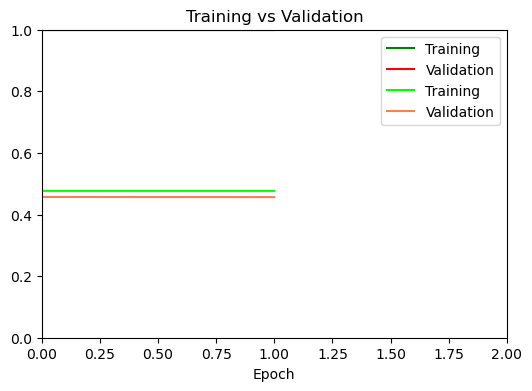

In [ ]:
plot_train_val_metrics(history_11, metric="recall", loss= True)

85/85 [==============================] - 3s 35ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       463
           1       0.83      1.00      0.91      2254

    accuracy                           0.83      2717
   macro avg       0.41      0.50      0.45      2717
weighted avg       0.69      0.83      0.75      2717



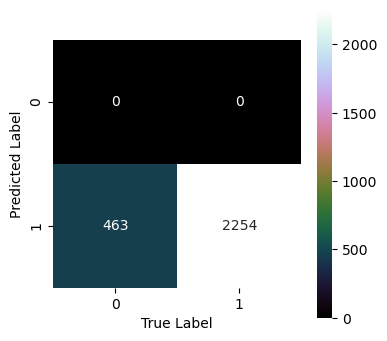

In [ ]:
y_val_pred = model_11.predict(X_val_pad)
y_val_pred_rounded = y_val_pred.round().astype(int)

print(classification_report(y_val, y_val_pred_rounded))
plot_heatmap(confusion_matrix(y_val, y_val_pred_rounded))

## BERT Modeling

### Read Data

### Train test split

### Tokenization

### Fixing token counts of all documents

### Transformation Vectors to Matrices

### Transformation Matrix to Tensorflow tensor

### Batch Size

### Creating optimization

### Creating Model with TPU

### Model Fiting

### Model evaluation

### Compare Models F1 Scores, Recall Scores and Average Precision Score

### Conclusion

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___